In [1]:
# June 8, 2021 
# For visualization purposes started a notebook

# Modules:

# Data_Read.py:


In [2]:
# # https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o
# from IPython.display import Image
# from IPython.core.display import HTML 
# Image(url= "http://my_site.com/my_picture.jpg")

In [3]:
#  Credit:
# https://stackoverflow.com/questions/6579496/using-print-statements-only-to-debug
#  re-execute after changing DEBUG value
DEBUG = False #True

# diagnostics printouts only if required; use log() instead of print to output diagnostics

def log(s):
    if DEBUG:
        print(s)

# log("hello world")

In [4]:
    from datetime import datetime
#     import df_2_plot        # Alexey's routine to plot scatter plot of Series(counts) vs index (years)
    import logging          # to dump diagnostics in src/output.txt
#     import Data_Read        # Alexey's routine to read data, clean empty columns
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np



In [5]:
#  Data_Read.py:
def Read_n_Clean_csv_NaN_columns(URL_file: str, empty_DataFrame):
    '''
    To use:
    import Data_Read
    Read_n_Clean_csv_NaN_columns(URL_file: str, empty_DataFrame)

    imports URL_file, and drops in-place empty (NaN) columns
    '''

    import pandas as pd

    data_df_pd = pd.read_csv(URL_file)

    #  Check for column population with Nan's
    '''
    (data_rows, data_columns) = data_df_pd.shape
    cols_2_drop = []
    cols_2_drop_counter = 0
    for i in data_df_pd.columns:
        if data_df_pd[i].isna().sum() == data_rows:  # not a single data row all are NaN's
            cols_2_drop.append(i)  # add NaN column to drop
            print(f'Column "{i}" has no data rows and will be dropped')
            cols_2_drop_counter += 1
    print(
        f'Total of {cols_2_drop_counter} columns of are dropped as all NaNs of {data_columns} total')
    print(f'Dropped columns are : {cols_2_drop}')

    # Actual purge of empty columns (only NaNs)
    data_df_pd.drop(columns=cols_2_drop, inplace=True)
    '''
    
    #  Print remaining columns
    # print(f'Remaining columns are: {data_df_pd.head()}')
    # data_df_pd.info() # displays non-null counts

    return data_df_pd  # empty DataFrame is passed in to enable return of the resulting DF



def Clean_2col_df_NaN_rows(two_column_DataFrame):
    '''
    Receive two columns data frame, remove rows with
    NaNs in ether column
    '''
    # Ref: https://datatofish.com/rows-with-nan-pandas-dataframe/
    # Ref: https://datatofish.com/dropna/
    df_no_Nans = two_column_DataFrame.dropna()

    return df_no_Nans  # empty DataFrame is passed in to enable return of the resulting DF


In [6]:
#  df_2_plot.py:
# Subroutine to plot two columns
def plot_two_cols(df_2_plot, y_lbl_in: str, col_in: str, fig_in, axs_in, 
                  label_in: str, plt_type='s', l_wdth=1):
    '''
    plot_two_cols(df_2_plot, y_lbl_in: str, col_in: str, plt_type='s', l_wdth=1)
    plot scatter plot of a panda three columns dataframe
    first column - years, second - species, third - counts
    parameters can be passed later

    Parameters: =================
    plt_type = 's' - produce scatter plot
    plt_type = 'l' - produce line plot

    df_2_plot.head() is passed in
        Return Year Species      0
    2          1976    Coho  21934
    5          1977    Coho  25826
    x = df_2_plot.iloc[:,0]  # years
    y = df_2_plot.iloc[:,2]  # counts
    x_lbl = df_2_plot.columns[0]
    y_lbl = df_2_plot.iloc[0,1] + ' salmon'

    '''
    # import matplotlib.pyplot as plt   # supposed to be done in main

    # fig, axs = plt.subplots(figsize=(15, 10)) # call in main to enable overlap

    x = df_2_plot.iloc[:, 0] # years
    y = df_2_plot.iloc[:, 2] # fish counts
    x_lbl = df_2_plot.columns[0]  # 'Return Year'
    y_lbl = y_lbl_in  # whatever is passed into the function
    # 1st row of middle ('Species') column
#     g_legend = df_2_plot.iloc[0, 1] # 'Coho'

    if plt_type == 's': # generate scatter plot
        axs_in.scatter(x, y, color = col_in, label=label_in, linewidth=l_wdth)
        axs_in.set_xlabel(x_lbl)
        axs_in.set_ylabel(y_lbl)

    elif plt_type == 'l': # generate scatter plot
        axs_in.plot(x, y, color = col_in, label=label_in, linewidth=l_wdth)
        axs_in.set_xlabel(x_lbl)
        axs_in.set_ylabel(y_lbl)

    else: # plt_type is neither 's', nor 'l' return message
        print('Please use plt_type = ''s'', or ''l''')
        
        
        
#     axs_in.legend([g_legend])  # [] required, otherwise single character as string is iterable
#     axs_in.grid()
    # font sizes, etc. later
    # plt.show()   # perform in main
    pass

In [7]:
# Data_EDA.py:
def read_data(DataFrame=''):
    # Separate into a subroutine to pass df already in memory to avoid
    # re-read

    #  call data import script
    # Data_Read.py stored in the same dir 'scr'; Imports and cleans empty columns

    #     from datetime import datetime
    #     import df_2_plot        # Alexey's routine to plot scatter plot of Series(counts) vs index (years)
    #     import logging          # to dump diagnostics in src/output.txt
    #     import Data_Read        # Alexey's routine to read data, clean empty columns
    #     import pandas as pd
    #     import matplotlib.pyplot as plt
    #     import numpy as np

    # URL_file = 'https://data.wa.gov/resource/auvb-4rvk.csv'
    # 'https: // data.wa.gov/api/views/auvb-4rvk/rows.csv?accessType = DOWNLOAD'
    URL_file = '../data/WDFW-Coded_Wire_Tag_Fish_Recoveries.csv'

    try:
        df.head
        # print('df pandas DataFrame DOES exist, skipping reading again.')
        # catch when df is None
        # pass
    except AttributeError:   # Neah unlikely to happen
        print('df pandas DataFrame DOES exists, but is None.')
    # catch when it hasn't even been defined
    except UnboundLocalError: # local variable 'df' referenced before assignment
        print('NO df pandas DataFrame exists, reading data branch')
        # Empty DataFrame is passed as a parameter to get back one with data
        # df = Data_Read.Read_n_Clean_csv_NaN_columns(URL_file, pd.DataFrame())
        df = Read_n_Clean_csv_NaN_columns(URL_file, pd.DataFrame())
    except NameError:  # df does not exist => first run proceed to read data
        print('NO df pandas DataFrame exists, reading data branch')
        # Empty DataFrame is passed as a parameter to get back one with data
        # df = Data_Read.Read_n_Clean_csv_NaN_columns(URL_file, pd.DataFrame())
        df = Read_n_Clean_csv_NaN_columns(URL_file, pd.DataFrame())
    


    #     import matplotlib.pyplot as plt

    # x = df['returnyear']
    # y = df['species']
    # fig, axs = plt.subplots(figsize=(5, 10))
    # axs.scatter(x,y)

    # plt.show()  # Command required in VS Code to show figure
    #  Time series returnyear

    #  Check unique values
    # df['Species'].unique()
    # In[4]: df['Species'].unique()
    # Out[4]:
    # array(['Chinook', 'Coho', 'Chum', 'Steelhead', 'Pink', 'Sockeye',
    #        'Unknown', 'Atlantic Salmon', 'Cutthroat'], dtype=object)

    # /Users/alexey_imac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py: 2757: DtypeWarning: Columns(1, 3, 9, 15, 18, 21, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37) have mixed types.Specify dtype option on import or set low_memory = False.
    # py3compat.execfile(
    #     Total of 0 columns of are dropped as all NaNs of 43 total
    #     Dropped columns are: []

    # https: // stackoverflow.com/questions/29376026/find-mixed-types-in-pandas-columns
    # Mixed Data Types
    # Find columns that change type:
    # for col in df.columns:
    #     weird = (df[[col]].applymap(type) !=
    #              df[[col]].iloc[0].apply(type)).any(axis=1)
    #     if len(df[weird]) > 0:
    #         print(col)

    # Verified Date
    # Run
    # Location Name
    # PSC Code
    # Location Code
    # Recovery Gear Type
    # PSNET Recovery Gear Type
    # Recovery Date
    # Sample Type
    # Tag Code
    # Sex
    # Fisher Type
    # Maturity
    # Project Fish Number
    # Scale Card Number
    # Otolith Number
    # First Release Date
    # Last Release Date
    # Release Site
    # Rearing Hatchery
    # Stock Name
    # Release Run
    # Release Agency
    # Bag Label Comments
    # Fish Comments
    # Release Comments

    # EDA
    # df.columns  # see columns names
    # df['Species'].unique()
    # df['Return Year'].unique()
    # df.dtypes  # check the data type of all columns
    # Return Year                         int64
    # Verified Date                      object
    # Species                            object
    # Run                                object
    # Location Name                      object
    # PSC Code                           object
    # Location Code                      object
    # Process Project                    object
    # Recovery Gear Type                 object
    # PSNET Recovery Gear Type           object
    # Bag Label                          object
    # Head Number                         int64
    # Recovery Date                      object
    # Sample Type                        object
    # Tag Result                         object
    # Tag Code                           object
    # Fork Length(cm)                  float64
    # Sex                                object
    # Fisher Type                        object
    # Maturity                           object
    # Mark                               object
    # Project Fish Number                object
    # Sample Card Number                float64
    # Sample Card Record Number         float64
    # Scale Card Number                  object
    # Scale Card Line Number            float64
    # Otolith Number                     object
    # Brood Year                        float64
    # First Release Date                 object
    # Last Release Date                  object
    # Release Site                       object
    # Rearing Hatchery                   object
    # Stock Name                         object
    # Release Run                        object
    # Release Agency                     object
    # Bag Label Comments                 object
    # Fish Comments                      object
    # Release Comments                   object
    # Released Tag Adclip Count         float64
    # Released Tag No Adclip Count      float64
    # Released Untag Adclip Count       float64
    # Released Untag No Adclip Count    float64
    # InternalId                          int64
    # dtype: object

    # Check for weird data types:
    # for i in df.columns:
    #     print(f'Unique values in column {i}, {df[i].unique()}')

    # for i in df.columns:
    #     logging.info(f'Unique values in column {i}, {df[i].unique()}')

    #  https://www.askpython.com/python/built-in-methods/python-print-to-file
    #  dump exploratory outputs to file:
    # using Python’s logging module to print to the file
    # import logging
    # Create the file
    # and output every level since 'DEBUG' is used
    # and remove all headers in the output
    # using empty format=''
    # logging.basicConfig(filename='output.txt', level=logging.DEBUG, format='')

    # logging.debug('Hi')
    # logging.info('Hello from AskPython')
    # logging.warning('exit')

    #  Clean rows where either of two (2) columns has a NaN to prepare for plot
    #  plt_2_cols_cleaned = Data_Read.Clean_2col_df_NaN_rows(df[['Return Year', 'Species']])
    plt_2_cols_cleaned = Clean_2col_df_NaN_rows(df[['Return Year', 'Species']])



    # import df_2_plot
    # df_2_plot.plot_two_cols(plt_2_cols_cleaned, params=0)
    # df2c becomes a series df2c.index
    df2c = plt_2_cols_cleaned.groupby(
        ['Return Year', 'Species']).size()  # No of all records per year
    # df_2_plot.plot_two_cols(df2c, 'Return Year', 'Total records')

    # DataFrame
    # df_tmp = pd.DataFrame({'count': plt_2_cols_cleaned.groupby(
    #         ['Return Year', 'Species']).size()})


    #  In[22]: df_tmp.head
    # Out[22]:
    # <bound method NDFrame.head of
    # Return Year Species    count
    # 1976        Chinook    14482
    #             Chum           5
    #             Coho       21934
    # 1977        Chinook     9913
    #             Chum           4
    # ...                      ...
    # 2020        Coho       14245
    #             Steelhead     12
    #             Unknown        4
    # 2021        Chinook       33
    #             Steelhead      1

    # [211 rows x 1 columns] >

    # https: // pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
    # https: // pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
    # df2c.loc[("Return Year", "Chinook")]
    # df2c.loc[("Chinook")]
    # df2c.loc["Chinook"]
    # health_df[health_df['Country Code'] == 'USA'][health_df['Indicator Name']
    #                                               == 'Age at first marriage, female'].iloc[:, 4:]

    # Ref. https://appdividend.com/2020/10/27/how-to-convert-python-string-to-date/
    # from datetime import datetime
    # date_str = '05/09/2019'

    # dto = datetime.strptime(date_str, '%m/%d/%Y').date()
    # print(type(dto))  # <class 'datetime.date'>
    # print(dto)  # 2019-05-09

    #  Data extraction
    df_tmp = df2c.reset_index()  # each species gets individual year
    df_tmp.rename(columns = {0:'Total Count'}, inplace = True) # summary column had name 0
    # df_tmp[df_tmp['Species'] == 'Coho'] # Year, Coho, count
    # df_2_plot = df_tmp[df_tmp['Species'] == 'Coho']
    # df_2_plot.head()
    # type(df_2_plot) # pandas.core.frame.DataFrame
    # df_2_plot.shape # (45, 3) 1976 ~2021, Year, Species, Count
    # df_2_plot.iloc[:,0]  # extracts year
    # df_2_plot.iloc[0,1] # 'Coho'

    # initialize figure
    fig, axs = plt.subplots(figsize=(15, 10))

    #     df_2_plot.plot_two_cols(
    #         df_tmp[df_tmp['Species'] == 'Coho'],
    plot_two_cols(
        df_tmp[df_tmp['Species'] == 'Coho'],
        y_lbl_in='Fish count', col_in='red', fig_in = fig, 
        axs_in = axs, label_in = 'Coho', plt_type='s')

    #     df_2_plot.plot_two_cols(
    #         df_tmp[df_tmp['Species'] == 'Chinook'],
    plot_two_cols(
        df_tmp[df_tmp['Species'] == 'Chinook'],
        y_lbl_in='Fish count', col_in='blue', fig_in=fig, 
        axs_in=axs, label_in = 'Chinook', plt_type='s')

    axs.legend(loc='upper right')  # [] required, otherwise single character as string is iterable
    axs.grid()


    plt.show()
    return df; # to make df available for main memory

In [8]:

def font_sizes(font_size: int, f_legend: int):  # font_size = 10 ~ default
    '''
    font_sizes(font_size: int, f_legend: int)
    reset all graphs fonts to font_size.
    More fine-tuning is available individually
    if f_legend is passed, individual adjustment is performed
    '''
#     import matplotlib.pyplot as plt
    plt.rc('font', size=font_size) #controls default text size
    plt.rc('axes', titlesize=font_size) #fontsize of the title
    plt.rc('axes', labelsize=font_size) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=font_size) #fontsize of the y tick labels
    plt.rc('legend', fontsize=f_legend) #fontsize of the legend
    pass

NO df pandas DataFrame exists, reading data branch


/Users/alexey_imac/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: DtypeWarning: Columns (1,3,9,15,18,21,24,26,28,29,30,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


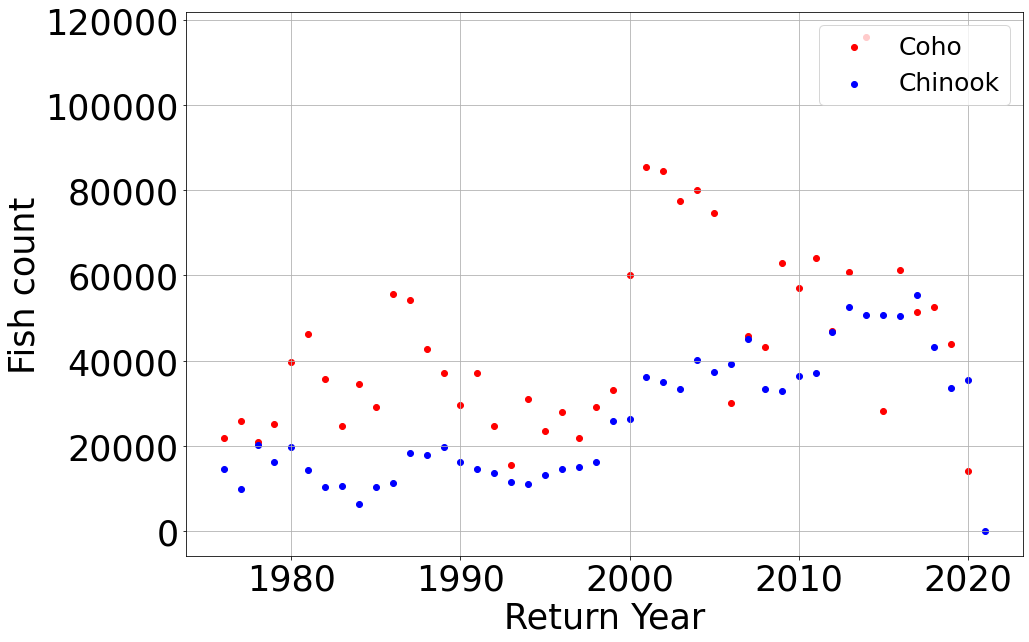

In [19]:
df = read_data();


In [10]:
# locs, labels = xticks()  # Get the current locations and labels.

In [11]:
plt_2_cols_cleaned = Clean_2col_df_NaN_rows(df[['Return Year', 'Species']])
df2c = plt_2_cols_cleaned.groupby(
        ['Return Year', 'Species']).size()  # No of all records per year

df_tmp = df2c.reset_index()  # each species gets individual year



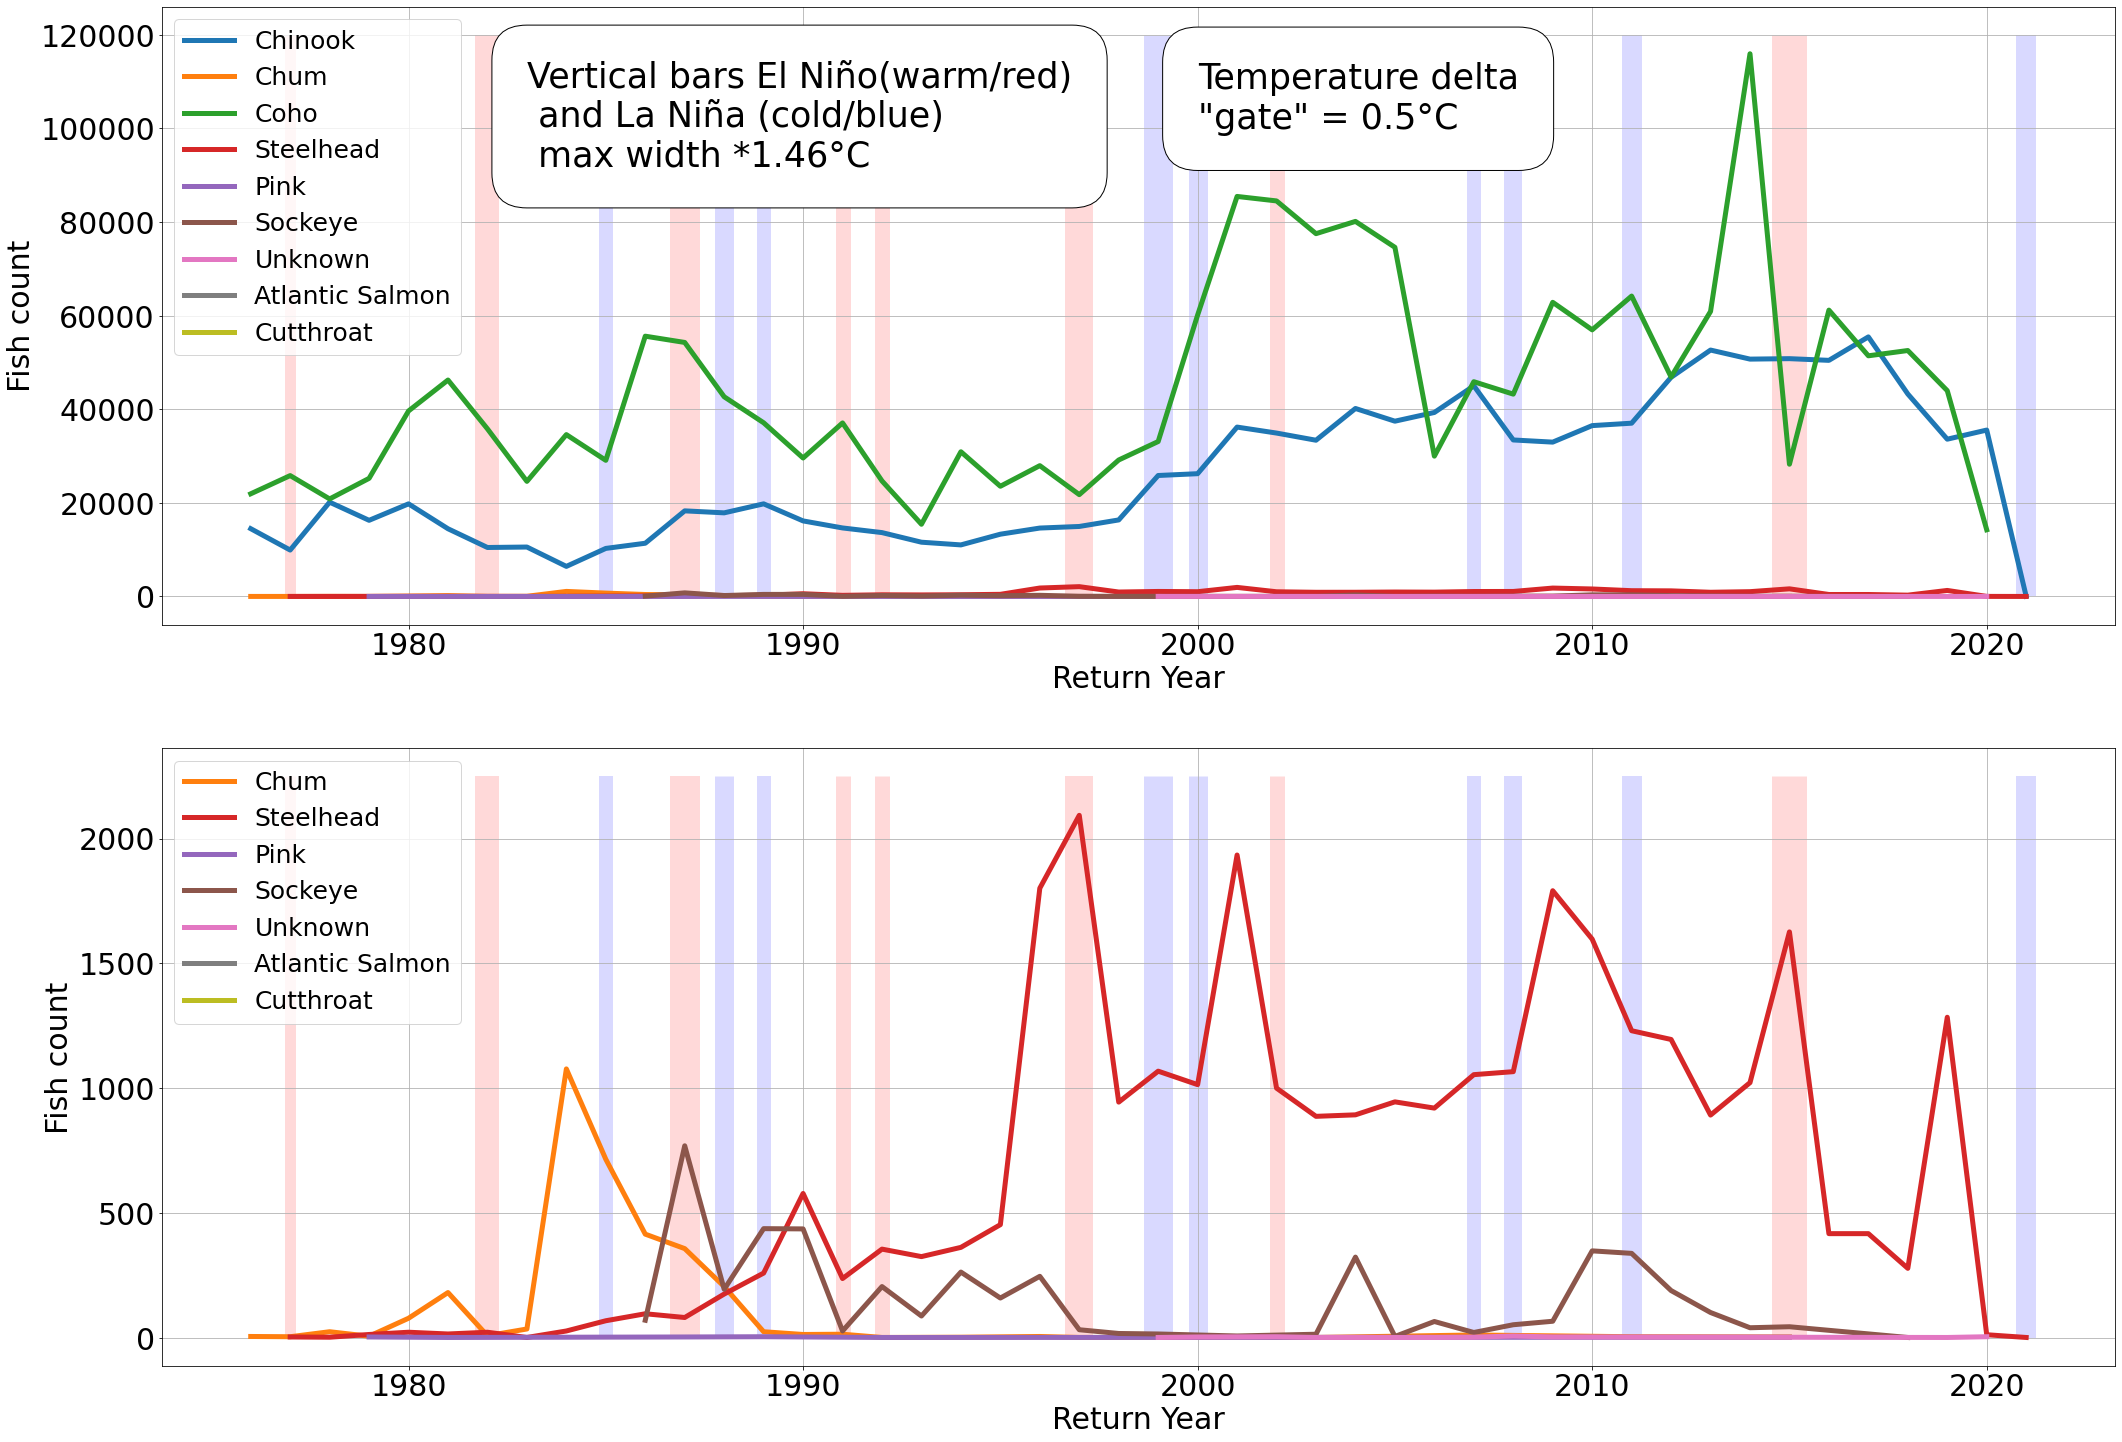

In [18]:
# Plot all data sub_series
# Get color cycler
#  https://stackoverflow.com/questions/53521396/how-to-implement-automatic-color-change-in-matplotlib-with-subplots
colors = plt.rcParams["axes.prop_cycle"]()

#  Initialize new figure
fig, axs = plt.subplots(2,1, figsize=(35, 25))

#  need list of unique colors
for i in df_tmp['Species'].unique(): # Check unique values in 'Species'
    #     print(f'Species = {i}')

    # Get the next color from the cycler
    c = next(colors)["color"]

    #  Plot all data
    plot_two_cols(
    df_tmp[df_tmp['Species'] == i],
    y_lbl_in='Fish count', col_in=c, fig_in=fig, 
    axs_in=axs[0], label_in = i, plt_type='l', l_wdth=5)  # axs[0] 1st subplot

    # Second subplot
    # All but 'Chinook' or 'Coho'
    if (i != 'Chinook' and i != 'Coho'):
# @@@
        plot_two_cols(
        df_tmp[df_tmp['Species'] == i],
        y_lbl_in='Fish count', col_in=c, fig_in=fig, 
        axs_in=axs[1], label_in = i, plt_type='l', l_wdth=5) # axs[1] 2nd subplot



        
    
# linewidth proportional to  ∆T°F  linewidth=6, alpha = 0.5
#  https://matplotlib.org/stable/gallery/misc/zorder_demo.html
# zorder = (lines~2)
transp_alpha = 0.15 # transparency setting 1-solid 0-invisible
# axs[0].vlines(2008, 0, 120000, colors='blue', linestyles='dashed', 
#               label='2008 Crisis', linewidth=3, alpha = transp_alpha, zorder=0) # zorder=0 ~ behind graph
axs[0].legend(loc='upper left')  # [] required, otherwise single character as string is iterable
axs[0].grid()
# axs[0].set_facecolor('w') 
# axs[0].set_xticks[]

# axs[1].vlines(2008, 0, 2250, colors='blue', linestyles='dashed', 
#               label='2008 Crisis', linewidth=6, alpha = transp_alpha, zorder=0) # zorder=0 ~ behind graph
axs[1].legend(loc='upper left')  # [] required, otherwise single character as string is iterable
axs[1].grid()


# Ocean temps block

Ocean_Temps = [-0.05, 0.50, -0.10, 0.24, 0.26, -0.28, 1.01, 0.48, -0.49, -0.60,
               0.24, 1.28, -0.82, -0.61, 0.31, 0.64, 0.64, 0.33, 0.48, -0.16, 
               -0.47, 1.17, -0.07, -1.23, -0.83, -0.30, 0.63, 0.26, 0.46, 0.03, 
               0.06, -0.61, -0.78, 0.30, -0.48, -0.85, -0.15, -0.33, 0.11, 1.46, 
               0.33, -0.21, 0.01, 0.48, -0.37, -0.85]

# Ref: https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php
Ocean_Temps = [-0.05, 0.50, -0.10, 0.24, 0.26, -0.28, 1.01, 0.48, -0.49, -0.60,
               0.24, 1.28, -0.82, -0.61, 0.31, 0.64, 0.64, 0.33, 0.48, -0.16, 
               -0.47, 1.17, -0.07, -1.23, -0.83, -0.30, 0.63, 0.26, 0.46, 0.03, 
               0.06, -0.61, -0.78, 0.30, -0.48, -0.85, -0.15, -0.33, 0.11, 1.46, 
               0.33, -0.21, 0.01, 0.48, -0.37, -0.85]
# Normalize for line width use
# Line color - red/blue if <>0
OTmin = min(Ocean_Temps)
OTmax = max(Ocean_Temps)
#  not using numpy array - number, but rather list comprehension
# a[:] = [x - 13 for x in a]
Ocean_Temps_n=[]
# Ocean_Temps_n[:] = [(x - OTmin)/(OTmax - OTmin) for x in Ocean_Temps]
# Ocean_Temps_n[:] = [(x)/(OTmax - OTmin) for x in Ocean_Temps]  # remove - OTmin to preserve signs
temp_ampl = max(abs(OTmin), abs(OTmax))
Ocean_Temps_n[:] = [x/temp_ampl for x in Ocean_Temps] # max amplitude of 1 +/- does not matter

Ocean_Temps_Years = list(range(1976,2022))

#  now zip it all together
Temps_tpl_List = list(zip(Ocean_Temps_Years, Ocean_Temps_n))
# Temps_tpl_List[5][0] = 1981
# Temps_tpl_List[5][1] = -0.28

df_OT = pd.DataFrame(Temps_tpl_List, columns=['Year','*1.46°F change'])

# #  Initialize new figure
# fig, axs = plt.subplots(figsize=(15, 15))

# x = df_OT.loc[:, 'Year']
# y = df_OT.loc[:, '*1.46°F change']
# axs.scatter(x, y, color = 'green', label='El Niño/La Niña')
# axs.set_xlabel('Observation years')
# axs.set_ylabel('*1.46°F change')
# axs.set_title('El Niño(warm) / La Niña(cold) years')

# axs.legend(loc='upper left')  # [] required, otherwise single character as string is iterable
# axs.grid()

temp_gate = 0.5/1.46         # from 0 to +- 1, plot only if equal or more; turn 1.46(max delta)/0.5 = 1/x
temp_gate_title = round(temp_gate * 1.46, 1) # for graph text equivalent in deg celcius
temp_width_scale = 35     # max vertical line width
temp_alpha = 0.15        # transparency level (1 solid)


# log is a conditional print function if DEBUG=True set at the top of the notebook
# Changing DEBUG in a single cell to false disables all debugging log printouts

# For every year see if plot is needed, and what line thickness, and color; No labels
for i in range(df_OT.shape[0]):
    [year, temp] = df_OT.iloc[i] # get year and NORMALIZED temperature change
    log(f'i = {i}, year = {year}, temp = {temp}')
    if abs(temp) >= temp_gate: # plot only if temp change is significant
        log('Entered if abs(temp) >= temp_gate:')
        if temp < 0:
            vlc = 'blue' # cold La Niña year Vertical_Line_Color = vlc
            log('Assigned blue')
        else:
            vlc = 'red'  # warm El Niño year
            log('assigned red')

        vlw = int(abs(temp) * temp_width_scale)  # int max width if abs(i) = 1
        log(f'assigned line width {vlw}')

         # no labels - color and line widths speak for themselves
        x = year
        log(f'x = {x}, will try to plot vertical line vlc = {vlc}, vlw = {vlw}')
        axs[0].vlines(x, 0, 120000, colors=vlc, linestyles='solid',
                       linewidth=vlw, alpha = temp_alpha, zorder=0) # zorder=0 ~ behind graph

        axs[1].vlines(x, 0, 2250, colors=vlc, linestyles='solid',
                       linewidth=vlw, alpha = temp_alpha, zorder=0) # zorder=0 ~ behind graph

# plt.style.use('ggplot')

# plt.style.use('classic')
font_sizes(35, 25)  # call font sizes def overall and legend
#  https://stackoverflow.com/questions/17086847/box-around-text-in-matplotlib
axs[0].text(1983, 92000, \
'Vertical bars El Niño(warm/red)\n \
and La Niña (cold/blue)\n max width *1.46°C', backgroundcolor='w',
bbox=dict(facecolor='w', edgecolor='black', boxstyle='round,pad=1'))

axs[0].text(2000, 100000, \
f'Temperature delta\n"gate" = {temp_gate_title}°C', backgroundcolor='w',
bbox=dict(facecolor='w', edgecolor='black', boxstyle='round,pad=1'))

# @@@ bookmark - Ctrl+F @@@

plt.show()


https://en.wikipedia.org/wiki/El_Niño#Occurrences
Image command has to be in a markown cell
## A timeline of all the El Niño episodes between 1900 and 2021.
!['A timeline of all the El Niño episodes between 1900 and 2021'](https://upload.wikimedia.org/wikipedia/en/timeline/b9f4dbd25612530c0ff713be19ef765f.png)

In [13]:
# Sampling block
# Given Species determine if temperature makes a difference
# Split years into Warm / Cold givena threshold/"gate" between 0 and 1; 1 being max temp delta

# Pseudocode:
# https://en.wikipedia.org/wiki/Pseudocode
# Years_WA = [];
# Years_B = Years - Years_WA;
# For unique, given 'Species'
# Runs_WA = [].Years_WA
# Runs_B = [].Years_B




In [15]:
df.columns


Index(['Return Year', 'Verified Date', 'Species', 'Run', 'Location Name',
       'PSC Code', 'Location Code', 'Process Project', 'Recovery Gear Type',
       'PSNET Recovery Gear Type', 'Bag Label', 'Head Number', 'Recovery Date',
       'Sample Type', 'Tag Result', 'Tag Code', 'Fork Length (cm)', 'Sex',
       'Fisher Type', 'Maturity', 'Mark', 'Project Fish Number',
       'Sample Card Number', 'Sample Card Record Number', 'Scale Card Number',
       'Scale Card Line Number', 'Otolith Number', 'Brood Year',
       'First Release Date', 'Last Release Date', 'Release Site',
       'Rearing Hatchery', 'Stock Name', 'Release Run', 'Release Agency',
       'Bag Label Comments', 'Fish Comments', 'Release Comments',
       'Released Tag Adclip Count', 'Released Tag No Adclip Count',
       'Released Untag Adclip Count', 'Released Untag No Adclip Count',
       'InternalId'],
      dtype='object')

In [17]:
# plt_2_cols_cleaned = Clean_2col_df_NaN_rows(df[['Return Year', 'Species']])



# # import df_2_plot
# # df_2_plot.plot_two_cols(plt_2_cols_cleaned, params=0)
# # df2c becomes a series df2c.index
# df2c = plt_2_cols_cleaned.groupby(
#     ['Return Year', 'Species']).size()  # No of all records per year


font_sizes(30, 25)

In [21]:
axs

array([<AxesSubplot:xlabel='Return Year', ylabel='Fish count'>,
       <AxesSubplot:xlabel='Return Year', ylabel='Fish count'>],
      dtype=object)

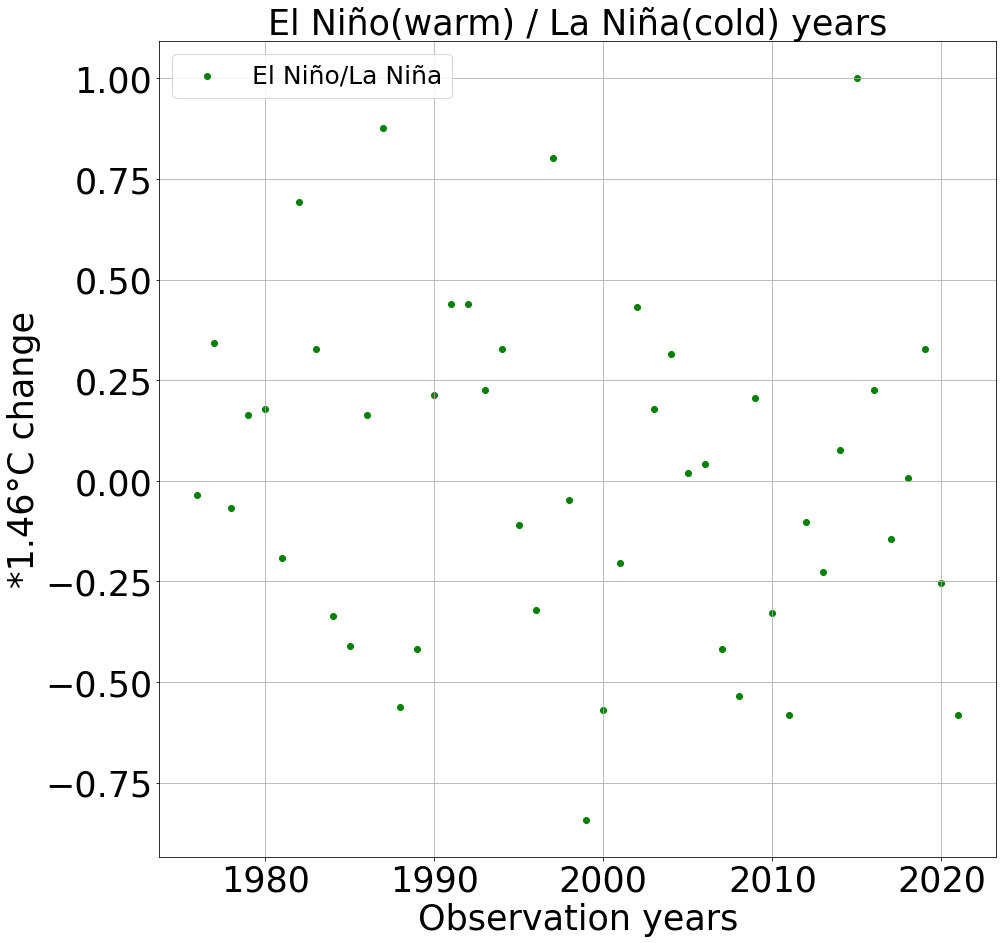

In [22]:
# Ref: https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php
Ocean_Temps = [-0.05, 0.50, -0.10, 0.24, 0.26, -0.28, 1.01, 0.48, -0.49, -0.60,
               0.24, 1.28, -0.82, -0.61, 0.31, 0.64, 0.64, 0.33, 0.48, -0.16, 
               -0.47, 1.17, -0.07, -1.23, -0.83, -0.30, 0.63, 0.26, 0.46, 0.03, 
               0.06, -0.61, -0.78, 0.30, -0.48, -0.85, -0.15, -0.33, 0.11, 1.46, 
               0.33, -0.21, 0.01, 0.48, -0.37, -0.85]
# Normalize for line width use
# Line color - red/blue if <>0
OTmin = min(Ocean_Temps)
OTmax = max(Ocean_Temps)
#  not using numpy array - number, but rather list comprehension
# a[:] = [x - 13 for x in a]
Ocean_Temps_n=[]
# Ocean_Temps_n[:] = [(x - OTmin)/(OTmax - OTmin) for x in Ocean_Temps]
# Ocean_Temps_n[:] = [(x)/(OTmax - OTmin) for x in Ocean_Temps]  # remove - OTmin to preserve signs
temp_ampl = max(abs(OTmin), abs(OTmax))
Ocean_Temps_n[:] = [x/temp_ampl for x in Ocean_Temps] # max amplitude of 1 +/- does not matter

Ocean_Temps_Years = list(range(1976,2022))

#  now zip it all together
Temps_tpl_List = list(zip(Ocean_Temps_Years, Ocean_Temps_n))
# Temps_tpl_List[5][0] = 1981
# Temps_tpl_List[5][1] = -0.28

df_OT = pd.DataFrame(Temps_tpl_List, columns=['Year','*1.46C change'])

#  Initialize new figure
fig, axs = plt.subplots(figsize=(15, 15))

x = df_OT.loc[:, 'Year']
y = df_OT.loc[:, '*1.46C change']
axs.scatter(x, y, color = 'green', label='El Niño/La Niña')
axs.set_xlabel('Observation years')
axs.set_ylabel('*1.46°C change')
axs.set_title('El Niño(warm) / La Niña(cold) years')

axs.legend(loc='upper left')  # [] required, otherwise single character as string is iterable
axs.grid()



In [23]:
# Warm_Years = Ocean_Temps > 0.5
# TypeError: '>' not supported between instances of 'list' and 'float'
# num
# filter_arr = arr > 42

# newarr = arr[filter_arr]
# https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html
# Method 1 : DataFrame Way
# newdf = df[(df.origin == "JFK") & (df.carrier == "B6")]

# df_OT[df_OT[[1]]]
# df.iloc[:, [1]] # EXAMPLE of column extraction by number
df_OT.iloc[:,[1]] > 0.5/1.46 # nYnorm = Xoriginal/abs_max, x>0.5 => Y > 0.5/abs_max (abs_max = 1.46)
# OTmin, OTmax # (-1.23, 1.46)
# selecting rows based on condition 
# rslt_df = dataframe[dataframe['Percentage'] > 70] 
# @@@
# filter = df_OT.iloc[:,[1]] > 0.5/1.46
threshold_temp = 0.48
filter = df_OT['*1.46C change'] > threshold_temp/1.46
filter
tmpHot = df_OT[filter] #.dropna(axis=1) #.iloc[:,[1]]
# tmp = df_OT.loc[df_OT.iloc[:,[1]] > 0.5/1.46] # ValueError: Cannot index with multidimensional key
tmpHot
# tmpCold = df_OT[~filter] #.dropna(axis=1) #.iloc[:,[1]]
# tmpCold


,Year,*1.46C change
1,1977,0.342466
6,1982,0.691781
11,1987,0.876712
15,1991,0.438356
16,1992,0.438356
21,1997,0.801370
26,2002,0.431507
39,2015,1.000000


In [24]:
# Assesment #3, Question 2
from scipy import stats

def calculate_t_test(sample1, sample2, type_I_error_rate):
    '''Evaluates whether the two samples come from a population with the same
    population mean.  Returns a tuple containing the p-value for
    the pair of samples and True or False depending if the p-value is
    considered significant at the provided Type I Error Rate (i.e. false
    positive rate, i.e. alpha).
    You may use imports for this question.
    
    Parameters
    ----------
    sample1, sample2: NumPy array, NumPy array
    type_I_error rate: float
    
    Returns
    -------
    float, boolean
    '''
    p = stats.ttest_ind(sample1, sample2, equal_var=True)[1]
    return p, p <= type_I_error_rate

In [39]:
# collect warm / cold indices in Ocean temperatures to be used on df_tmp species returns
# @@@
# filter = df_OT.iloc[:,[1]] > 0.5/1.46
threshold_temp = 0.48
filter = df_OT['*1.46C change'] > threshold_temp/1.46
filter
tmpHot = df_OT[filter] #.dropna(axis=1) #.iloc[:,[1]]
# tmp = df_OT.loc[df_OT.iloc[:,[1]] > 0.5/1.46] # ValueError: Cannot index with multidimensional key
tmpHot['Year']
# tmpCold = df_OT[~filter] #.dropna(axis=1) #.iloc[:,[1]]
# tmpCold

1     1977
6     1982
11    1987
15    1991
16    1992
21    1997
26    2002
39    2015
Name: Year, dtype: int64

In [94]:
# see if tmpHot['Year'] could be used to extract returns for say 'Coho' for same years
# to form a numerical 'sample1' in terms of def calculate_t_test. then use "~" inverse (remaining)
# index to recover runs of the same species 'Coho' for other years to form 'sample2'. 
# Run calculate_t_test to see if they could have come from the same population meaning 
# El Niño/La Niña have no impact.
# Next loop through species to compare hypothesis
# Next loop through alpha / type_I_error_rate to see threshould triggering rejection
#@@@

# 1) Extract runs from df_tmp where 'Return Year' is in tmpHot, and 'Species' = 'Coho'
# df_tmp.head
# df_tmp['Return Year' == tmpHot].dropna()
# df_tmp[tmpHot]
# df_tmp[filter]
# filter
# zz = df_tmp[df_tmp['Species' == 'Coho']]
# zz[filter[:-1]]
# zz
# df_tmp['Species' == 'Coho']
# df_tmp
# df_tmp[df_tmp['Species' == 'Coho']]
df_tmp['Species'] == 'Coho'
# rslt_df = dataframe.loc[dataframe['Percentage'] > 70] 
# df_tmp.head()
# type(df_tmp)

# df_tmp.rename(columns = {0:'Total Count'}, inplace = True)
# df_tmp.head()
# len(df_tmp[df_tmp['Species'] == 'Coho'])  # 45 - does not include 2021
# df_tmp[df_tmp['Species'] == 'Coho']  # 46

# len(filter[:-1]) # len(filter) = 46 len(filter[:-1]) = 45
# filter[:-1]
# df_OT # 46 total from 0i = 1976 to 45i=2021

0      False
1      False
2       True
3      False
4      False
       ...  
206     True
207    False
208    False
209    False
210    False
Name: Species, Length: 211, dtype: bool

In [ ]:
for i in df_tmp['Species'].unique(): # Check unique values in 'Species'



In [25]:
# df_OT['*1.46C change'] 
# ~filter
tmpCold = df_OT[~filter] #.dropna(axis=1) #.iloc[:,[1]]
tmpCold

,Year,*1.46C change
0,1976,-0.034247
2,1978,-0.068493
3,1979,0.164384
4,1980,0.178082
5,1981,-0.191781
7,1983,0.328767
8,1984,-0.335616
9,1985,-0.410959
10,1986,0.164384
12,1988,-0.561644


In [37]:
whos

Variable                       Type           Data/Info
-------------------------------------------------------
Clean_2col_df_NaN_rows         function       <function Clean_2col_df_N<...>N_rows at 0x7fcc520c7050>
DEBUG                          bool           False
OTmax                          float          1.46
OTmin                          float          -1.23
Ocean_Temps                    list           n=46
Ocean_Temps_Years              list           n=46
Ocean_Temps_n                  list           n=46
Read_n_Clean_csv_NaN_columns   function       <function Read_n_Clean_cs<...>olumns at 0x7fcc520beef0>
Temps_tpl_List                 list           n=46
axs                            AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
c                              str            #bcbd22
calculate_t_test               function       <function calculate_t_test at 0x7fcbda321cb0>
colors                         cycle          <itertools.cycle object at 0x7fcbc2739640>
datetim

In [36]:
df_OT.head

<bound method NDFrame.head of     Year  *1.46C change
0   1976      -0.034247
1   1977       0.342466
2   1978      -0.068493
3   1979       0.164384
4   1980       0.178082
5   1981      -0.191781
6   1982       0.691781
7   1983       0.328767
8   1984      -0.335616
9   1985      -0.410959
10  1986       0.164384
11  1987       0.876712
12  1988      -0.561644
13  1989      -0.417808
14  1990       0.212329
15  1991       0.438356
16  1992       0.438356
17  1993       0.226027
18  1994       0.328767
19  1995      -0.109589
20  1996      -0.321918
21  1997       0.801370
22  1998      -0.047945
23  1999      -0.842466
24  2000      -0.568493
25  2001      -0.205479
26  2002       0.431507
27  2003       0.178082
28  2004       0.315068
29  2005       0.020548
30  2006       0.041096
31  2007      -0.417808
32  2008      -0.534247
33  2009       0.205479
34  2010      -0.328767
35  2011      -0.582192
36  2012      -0.102740
37  2013      -0.226027
38  2014       0.075342
39  2015  

In [28]:
df_tmp.head

<bound method NDFrame.head of      Return Year    Species      0
0           1976    Chinook  14482
1           1976       Chum      5
2           1976       Coho  21934
3           1977    Chinook   9913
4           1977       Chum      4
..           ...        ...    ...
206         2020       Coho  14245
207         2020  Steelhead     12
208         2020    Unknown      4
209         2021    Chinook     33
210         2021  Steelhead      1

[211 rows x 3 columns]>

In [35]:
# df_OT.head() #['Year', '*1.46°F change'] # 'Year', '*1.46°F change'

In [31]:
# # y, t
# for i in range(df_OT.shape[0]):
#     [y, t] = df_OT.iloc[i]
#     print(y, t)


1976.0 -0.03424657534246576
1977.0 0.3424657534246575
1978.0 -0.06849315068493152
1979.0 0.1643835616438356
1980.0 0.17808219178082194
1981.0 -0.19178082191780824
1982.0 0.6917808219178082
1983.0 0.3287671232876712
1984.0 -0.3356164383561644
1985.0 -0.410958904109589
1986.0 0.1643835616438356
1987.0 0.8767123287671234
1988.0 -0.5616438356164384
1989.0 -0.4178082191780822
1990.0 0.2123287671232877
1991.0 0.4383561643835617
1992.0 0.4383561643835617
1993.0 0.226027397260274
1994.0 0.3287671232876712
1995.0 -0.10958904109589042
1996.0 -0.3219178082191781
1997.0 0.8013698630136986
1998.0 -0.04794520547945206
1999.0 -0.8424657534246576
2000.0 -0.5684931506849314
2001.0 -0.2054794520547945
2002.0 0.4315068493150685
2003.0 0.17808219178082194
2004.0 0.31506849315068497
2005.0 0.02054794520547945
2006.0 0.0410958904109589
2007.0 -0.4178082191780822
2008.0 -0.5342465753424658
2009.0 0.2054794520547945
2010.0 -0.3287671232876712
2011.0 -0.5821917808219178
2012.0 -0.10273972602739725
2013.0 -0.22

In [33]:
df_OT.dtypes

Year               int64
*1.46C change    float64
dtype: object

In [34]:
i

45